### 1. Import and preprocess data

In [1]:
import json
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.textpreprocessing import TextPreprocessing

In [2]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [7]:
vocab_size = 8000
embedding_dim = 10
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = ""
training_size = 23000

In [10]:
text_preprocessing.set_datastore(datastore)
text_preprocessing.clean_datastore()
text_preprocessing.initize_tokenizer()
X_train_padded, X_test_padded, y_train, y_test = text_preprocessing.get_data()

/content/drive/MyDrive/Colab Notebooks/XAI/utils/textpreprocessing.py:37: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /content/drive/MyDrive/Colab Notebooks/XAI/utils/textpreprocessing.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(sentence)
/content/drive/MyDrive/Colab Notebooks/XAI/utils/textpreprocessing.py:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


### 2. Create model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [22]:
num_epochs = 50
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test), verbose=2)

Epoch 1/50
719/719 - 91s - 126ms/step - accuracy: 0.5111 - loss: 0.6931 - val_accuracy: 0.5700 - val_loss: 0.6920
Epoch 2/50
719/719 - 84s - 117ms/step - accuracy: 0.5597 - loss: 0.6914 - val_accuracy: 0.5700 - val_loss: 0.6900
Epoch 3/50
719/719 - 137s - 190ms/step - accuracy: 0.5596 - loss: 0.6896 - val_accuracy: 0.5700 - val_loss: 0.6879
Epoch 4/50
719/719 - 84s - 118ms/step - accuracy: 0.5596 - loss: 0.6880 - val_accuracy: 0.5700 - val_loss: 0.6858
Epoch 5/50
719/719 - 81s - 112ms/step - accuracy: 0.5596 - loss: 0.6863 - val_accuracy: 0.5700 - val_loss: 0.6838
Epoch 6/50
719/719 - 83s - 115ms/step - accuracy: 0.5596 - loss: 0.6851 - val_accuracy: 0.5700 - val_loss: 0.6824
Epoch 7/50
719/719 - 78s - 109ms/step - accuracy: 0.5596 - loss: 0.6844 - val_accuracy: 0.5700 - val_loss: 0.6814
Epoch 8/50
719/719 - 82s - 114ms/step - accuracy: 0.5596 - loss: 0.6836 - val_accuracy: 0.5700 - val_loss: 0.6806
Epoch 9/50
719/719 - 77s - 107ms/step - accuracy: 0.5596 - loss: 0.6830 - val_accuracy:

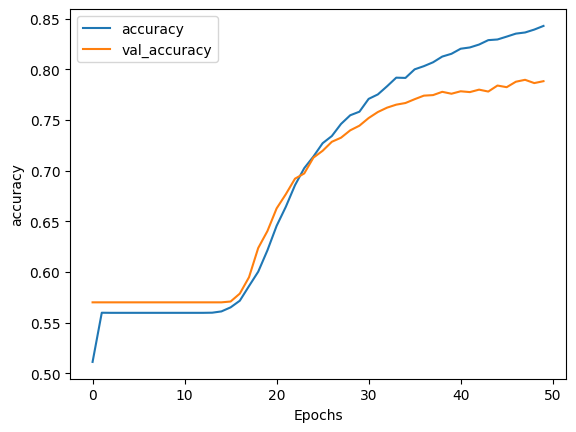

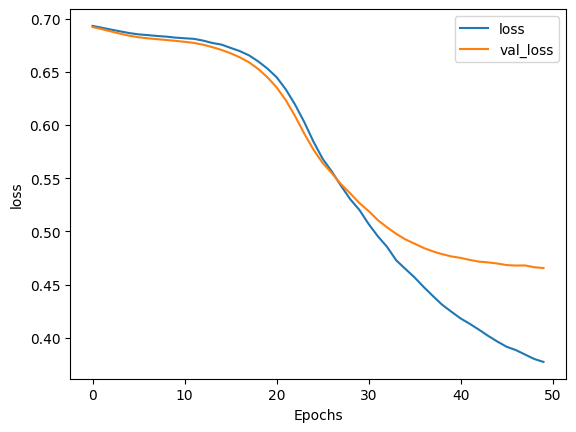

In [23]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
model.save('/content/drive/MyDrive/Colab Notebooks/XAI/models/sarcasm_2.keras', overwrite=True)